<h2 style='text-align:center;font-size:50px;background-color:black;border:50px;color:white'> HR Analytics Project- Understanding the Attrition in HR <h2>

# Problem Statement:

## Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics

## Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR

## Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

## How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

# Attrition affecting Companies

## A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# ----------------------------------------------------------------------------------------

In [1]:

# Import some of the important Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Now Lets Load the dataset 

df=pd.read_csv('HR_Employee_Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.shape

(1470, 35)

## As per the Above Introduction we have to find the attrition rates of Employees,So our Target variable will be "Attrition" column ,which is a classification Problem . . .

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Lets see top 10 rows of Of the dataset

In [5]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


#### Lets see last 10 rows of the dataset

In [6]:
df.sample(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
216,30,Yes,Travel_Frequently,334,Sales,26,4,Marketing,1,299,...,3,80,0,9,5,2,6,3,0,1
175,56,No,Travel_Rarely,713,Research & Development,8,3,Life Sciences,1,241,...,3,80,1,19,3,3,2,2,2,2
1209,60,No,Travel_Rarely,370,Research & Development,1,4,Medical,1,1697,...,3,80,1,19,2,4,1,0,0,0
675,31,No,Travel_Rarely,154,Sales,7,4,Life Sciences,1,941,...,2,80,0,13,2,4,7,7,5,2
354,30,No,Non-Travel,641,Sales,25,2,Technical Degree,1,475,...,2,80,1,4,2,4,2,2,2,2


#### It will pick any 5 random rows from the dataset

<h2 style='text-align:center;font-size:50px;background-color:orange;border:50px;color:white'> EDA <h2>

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Here we get a idea about Columns ,Non Null Columns , Dtypes of the columns ,and here it tell that it has 9 object columns and 26 int64 columns ..It also give us the idea about Memory Usage

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [11]:
df.dtypes.value_counts()

int64     26
object     9
dtype: int64

#### Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime  ---> are all Object columns  and rest all other columns are int64

In [14]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

#### There are different unique number of data's present in each columns

In [15]:
# Checking the uniqueness of target variable
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

#### There are only two unique values in the Target variable which are 'Yes' and 'No'. We can say Yes means the employess who are facing attrition and No means employees who are not facing any attrition.

In [17]:
# Checking attrition of Emoployee
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

#### We can see that the dataset is imbalanced and we are going to balance it later... And Here We can see that 1233 are the number of employee who didnt faced attrition and 237 are the employees who  faced attrition

In [19]:
#  Lets Remove Duplicates Values from the dataframe

df.drop_duplicates(keep='first',inplace=True)

In [20]:
df.shape

(1470, 35)

<h2 style='text-align:center;font-size:50px;background-color:orange;border:50px;color:white'> Checking the Null Values <h2>

In [21]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# We can see that there are 0 NaN values in all the columns ..

<AxesSubplot:>

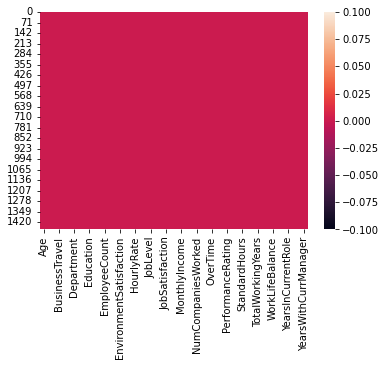

In [22]:
sns.heatmap(df.isnull())

### We have visualized it also to lets us understand it better.. We can see that there are no Null Value in all the columns

<h2 style='text-align:center;font-size:40px;background-color:orange;border:40px;color:white'> A. Univariate Analysis <h2>

In [24]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Density'>

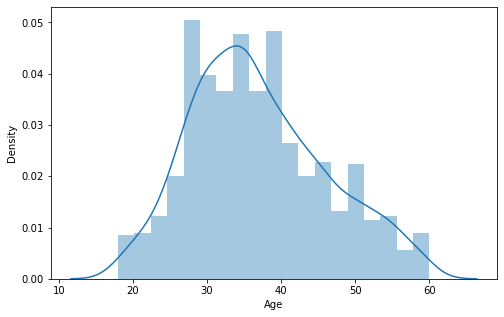

In [25]:
plt.figure(figsize=(8,5))
sns.distplot(df['Age'])

In [26]:
df['Age'].mean()

36.923809523809524

#### We can clearly see that the average age of employees are between 30 to 40 and the mean of the age columns is 37

<AxesSubplot:xlabel='Attrition', ylabel='count'>

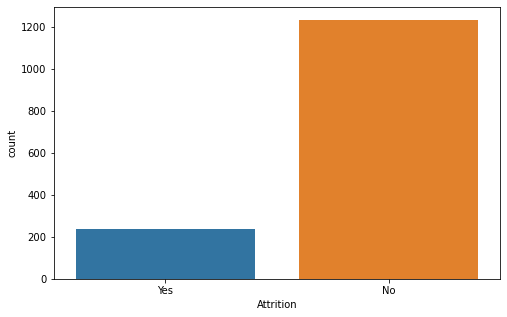

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(df['Attrition'])

#### So we can see that the maximum number of Employee belongs from "NO" catagory are not facing Attrition and "Yes" catagory Employees are the people which are facing attrition

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

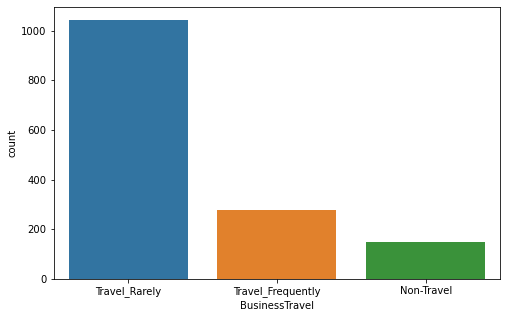

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(df['BusinessTravel'])

### Travel rerely  catagory people are more in numbers followed by Travel frequently Business Travel and the least is Non-Travel

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

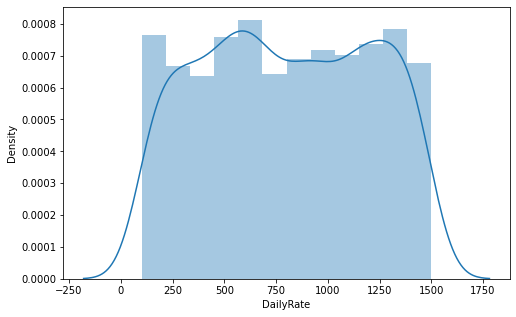

In [33]:
plt.figure(figsize=(8,5))
sns.distplot(df['DailyRate'])

In [34]:
df['DailyRate'].mean()

802.4857142857143

## WE can see that the average daily rate fall between 600 to 1000 and the mean of this column is 802 

In [35]:
df['DailyRate'].min()

102

In [37]:
df['DailyRate'].max()

1499

## Minimum daily rate is 102 and maximum daily offered is 1499

<AxesSubplot:xlabel='Department', ylabel='count'>

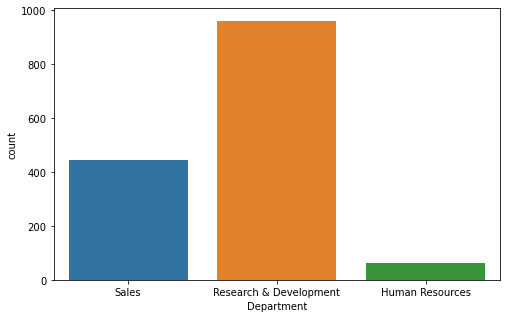

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(df['Department'])

### We can see that maximum employee belongs from Research and development Department followed by sales and the least is Human Resourse

<AxesSubplot:xlabel='Education', ylabel='count'>

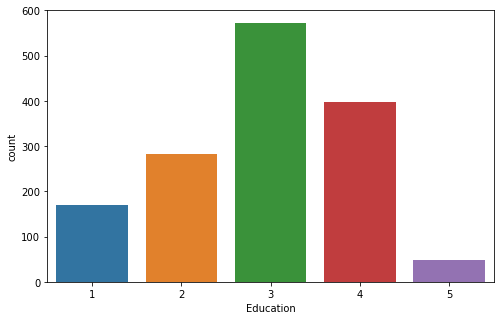

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(df['Education'])

### There is no Clear dispription about this columns but i am considering as a Tier of Education ,so here maximum employee belongs from Tier 3 education class and the least is from class 5

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


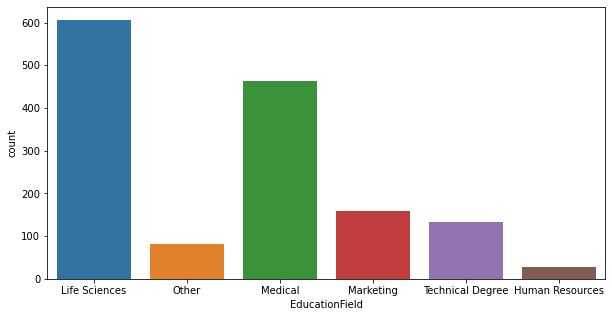

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(df['EducationField'])
print(df["EducationField"].value_counts())


### So here we can see that maximum employee belong from Life Science and the least is from Human Resource

<AxesSubplot:xlabel='EmployeeCount', ylabel='Density'>

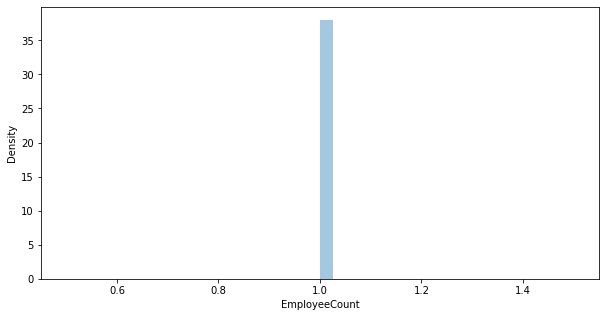

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(df['EmployeeCount'])

In [46]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

#### It is irrelevent for plotting and a irrelevent for model building to 

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


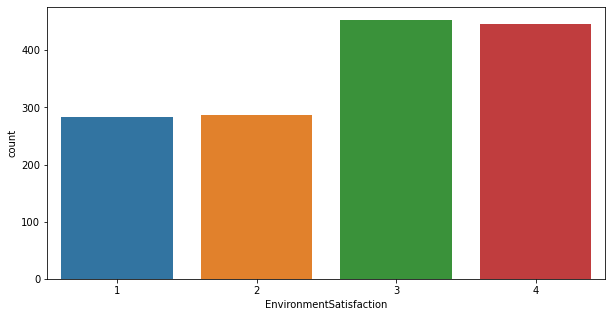

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(df['EnvironmentSatisfaction'])
print(df["EnvironmentSatisfaction"].value_counts())

#### Maximum Enviornment satisfaction is 3 and little less is 4

Male      882
Female    588
Name: Gender, dtype: int64


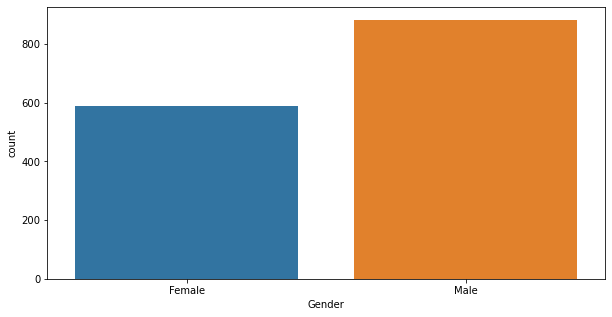

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(df['Gender'])
print(df["Gender"].value_counts())

#### We can see that the male employees are more in the organisation as compared to female

66    29
98    28
42    28
48    28
84    28
      ..
31    15
53    14
68    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64


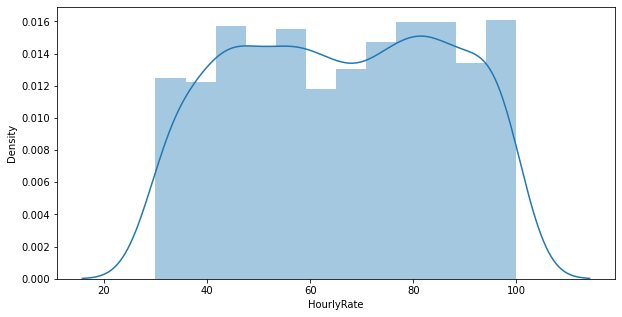

In [51]:
plt.figure(figsize=(10,5))
sns.distplot(df['HourlyRate'])
print(df["HourlyRate"].value_counts())

In [52]:
df['HourlyRate'].mean()

65.89115646258503

In [53]:
df['HourlyRate'].min()

30

In [54]:
df['HourlyRate'].max()

100

### The average Hourly rate is 66% and the min hourly rate is 30 and the maximum hourly rate is 100

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


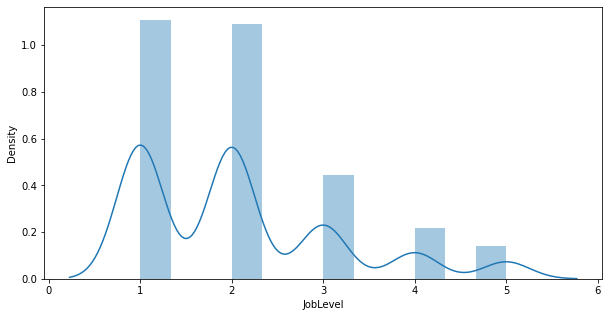

In [56]:
plt.figure(figsize=(10,5))
sns.distplot(df['JobLevel'])
print(df["JobLevel"].value_counts())

## There are almost 5 finds of job level ..But the maximum is 1 and 2 levels2

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

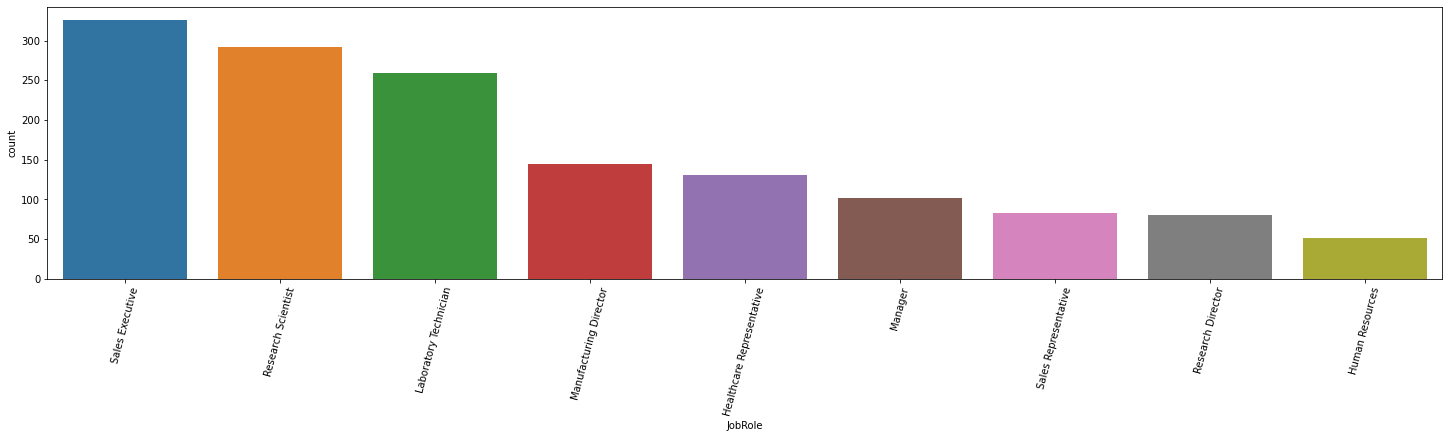

In [64]:
print(df["JobRole"].value_counts())
plt.figure(figsize=(25,5))
sns.countplot(df['JobRole'])

plt.xticks(rotation=75)

### Maximum job roles is for Sales Executive and the least is of Human resource

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

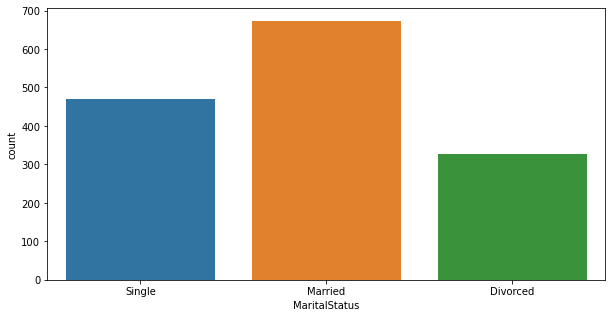

In [66]:
print(df["MaritalStatus"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(df['MaritalStatus'])



### We can see maximum people are married in any organistaion,followed by single and the least is Divorsed

Mean :- 6502.931292517007


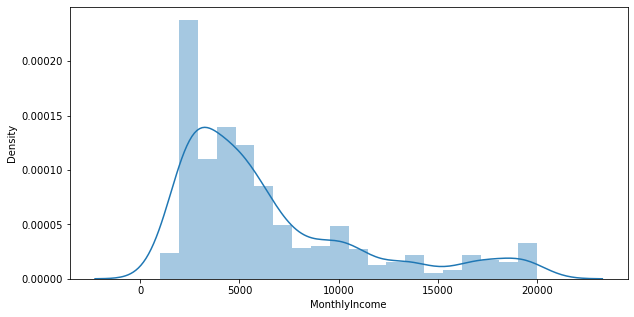

In [71]:

plt.figure(figsize=(10,5))
sns.distplot(df['MonthlyIncome'])
print ("Mean :-",df['MonthlyIncome'].mean())

### The Average salary offered in genral is 6503 

No     1054
Yes     416
Name: OverTime, dtype: int64


<AxesSubplot:xlabel='OverTime', ylabel='count'>

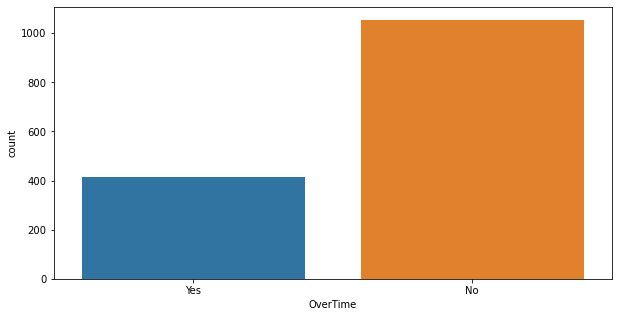

In [73]:
print(df["OverTime"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(df['OverTime'])


## We can see that the number of employees who opt for overtime is very less ..

Mean :- 15.209523809523809


<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

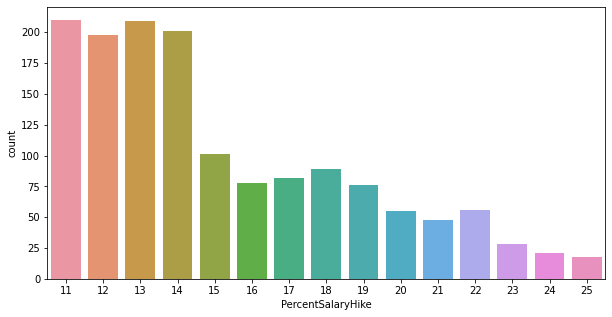

In [75]:
print ("Mean :-",df['PercentSalaryHike'].mean())
plt.figure(figsize=(10,5))
sns.countplot(df['PercentSalaryHike'])


### We can see that the average percentage of salary hike is 15% ..and 11 & 13 % is offered the max to employees and the least is 25%

Mean :- 80.0


<AxesSubplot:xlabel='StandardHours', ylabel='count'>

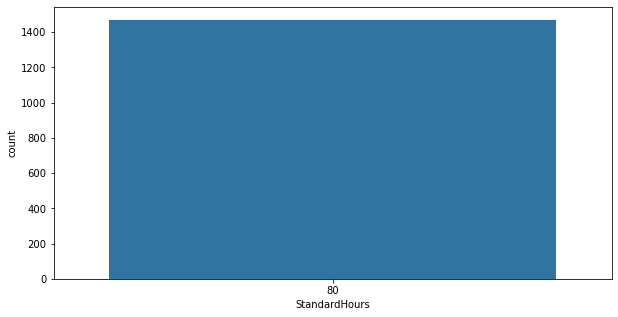

In [76]:
plt.figure(figsize=(10,5))
sns.countplot(df['StandardHours'])


In [78]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

### This also seems not to be an important columns .. as all the data inside this columns is just 80

<h2 style='text-align:center;font-size:40px;background-color:orange;border:40px;color:white'> B. Bivariate Analysis <h2>

In [81]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

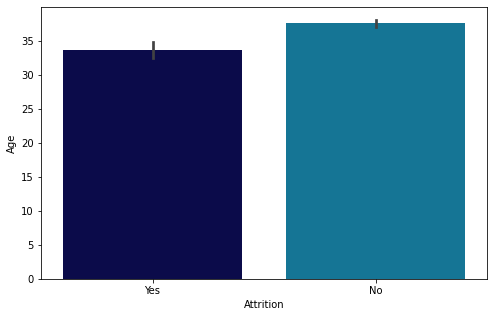

In [88]:
plt.figure(figsize=(8,5))
sns.barplot(x='Attrition',y='Age',data=df,palette='ocean')

### Here we are not getting  any clear idea whether which age group tends to be more part of attrition.. just got a little idea that after the age of 34 people tends to settle and they dont more toward attrition.

<AxesSubplot:xlabel='Attrition', ylabel='DailyRate'>

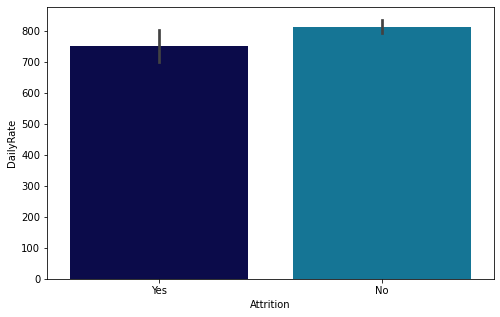

In [91]:
plt.figure(figsize=(8,5))
sns.barplot(x='Attrition',y='DailyRate',data=df,palette='ocean')

### We can see that till the daily rate of 750 employee are part of attrition but not after that..So if employees are paid well ,attrition will be less

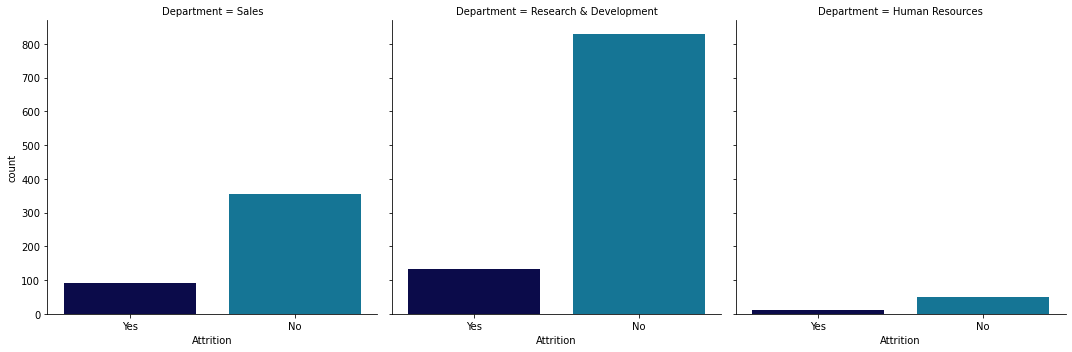

In [95]:
sns.catplot(x='Attrition',col='Department',data=df,kind='count',palette="ocean")

### In sales department only 10% people tends for attrition and in research and development only 15% tends for attrition ,it is maximum  and in Human resourse only 2% people tends for attrition which is the least

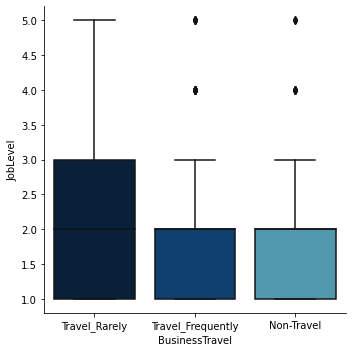

In [99]:
sns.catplot(x="BusinessTravel",y='JobLevel',data=df,kind="box",palette="ocean")

#### We can see that till job level 2 travel frquently and above job level 2 travel less but their till 2 there are 3 group also travel rarely,travel frequently and travel less

<AxesSubplot:xlabel='Gender', ylabel='DailyRate'>

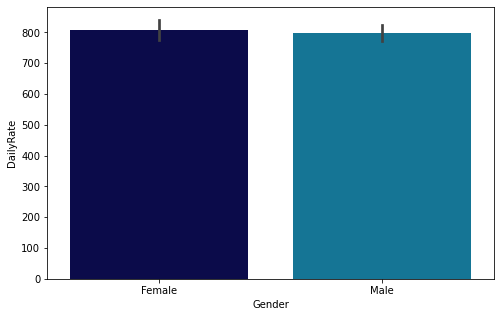

In [113]:
plt.figure(figsize=(8,5))
sns.barplot(x='Gender',y='DailyRate',data=df,palette='ocean')

### We can see that the daily rate is comman between Male and Females .. Their is no Baisness in daily rates ..

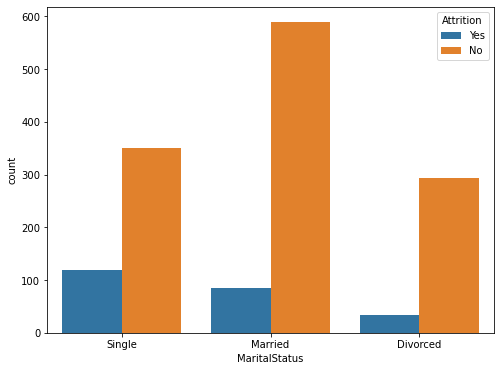

In [118]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['MaritalStatus'],hue=df["Attrition"],data=df)
plt.show()

### We can see that the attrition rate is more in single as compared to the married employees and the least attrition is in Divorsed Employee.. 

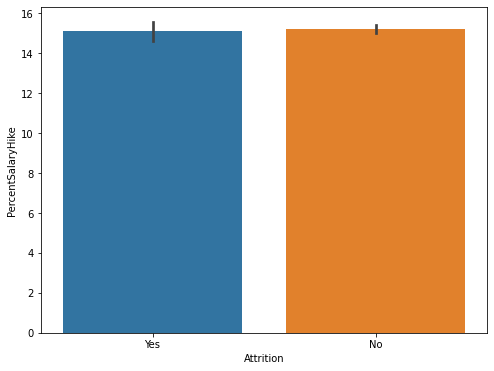

In [121]:
plt.figure(figsize=(8,6))
sns.barplot(y=df['PercentSalaryHike'],x=df["Attrition"],data=df)
plt.show()

### When can see that the attrition rate is normalized till  14.5 between both yes and No ...There are More chances of attrition in the employees if the % of salaryhike is less than 14.5

<AxesSubplot:xlabel='Gender', ylabel='TotalWorkingYears'>

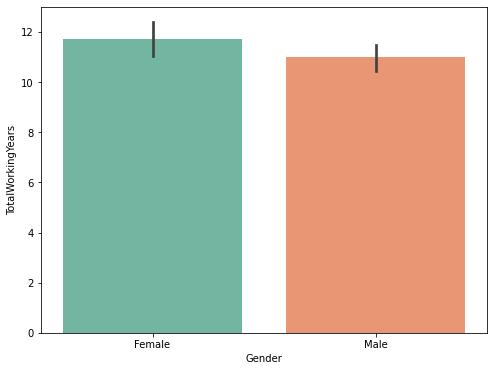

In [138]:
plt.figure(figsize=(8,6))
sns.barplot(x='Gender',y='TotalWorkingYears',data=df,palette="Set2")

### We can see that females are contributing more to the total working year as compared to Male

<Figure size 576x432 with 0 Axes>

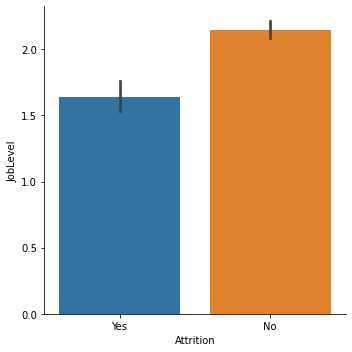

In [122]:
plt.figure(figsize=(8,6))
sns.catplot(x="Attrition",y='JobLevel',data=df,kind="bar")

### We can clearly see the Attrition in the job level ,here the employees are having attrition between 0 to 1.7 of the job level and after 1.7 of job level there is no attrition

<AxesSubplot:xlabel='Attrition', ylabel='HourlyRate'>

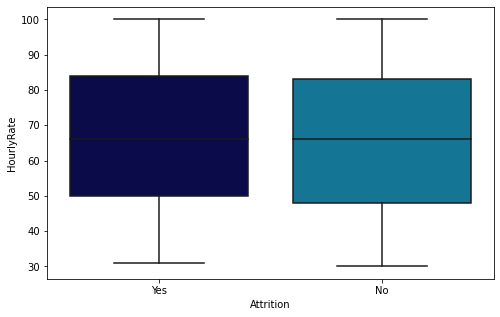

In [125]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition',y='HourlyRate',data=df,palette='ocean')

### Till 83 of Hourly rate we can see that attrition is present ,So in order to reduce it we should increase our Hourly rate ..

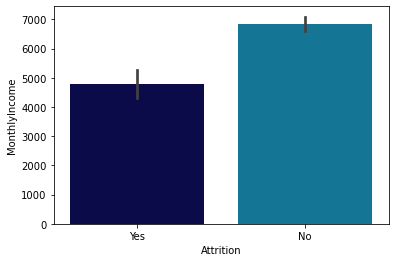

In [128]:
sns.barplot(x='Attrition',y='MonthlyIncome',data=df,palette="ocean")

### We can see that the attrition is present till the monthly income of 49000 ,so If we increase the monthly income we will be able to reduce the attrition 

<AxesSubplot:xlabel='Attrition', ylabel='EnvironmentSatisfaction'>

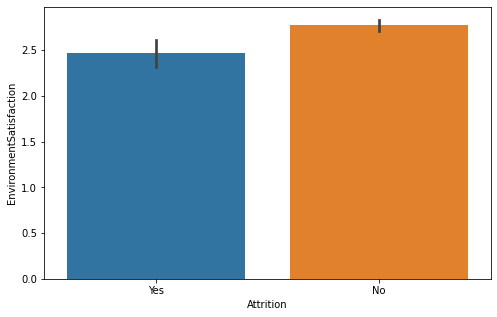

In [132]:
plt.figure(figsize=(8,5))
sns.barplot(x='Attrition',y='EnvironmentSatisfaction',data=df)

### Till 2.4 attrition rate is present in Enviornment satisfaction ,So this should be increased in order to reduce attrition 

<AxesSubplot:xlabel='Attrition', ylabel='JobInvolvement'>

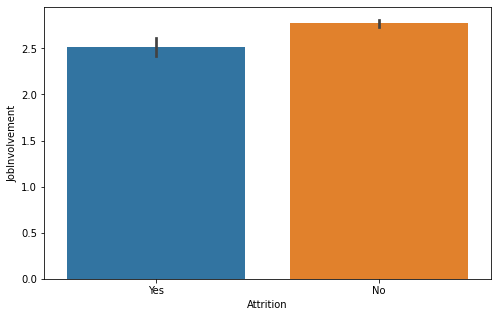

In [133]:
plt.figure(figsize=(8,5))
sns.barplot(x='Attrition',y='JobInvolvement',data=df)

### here we can see that when the person is more involved in the job the attrition rate is less but when his involvement is less the attrition is more

<AxesSubplot:xlabel='Attrition', ylabel='RelationshipSatisfaction'>

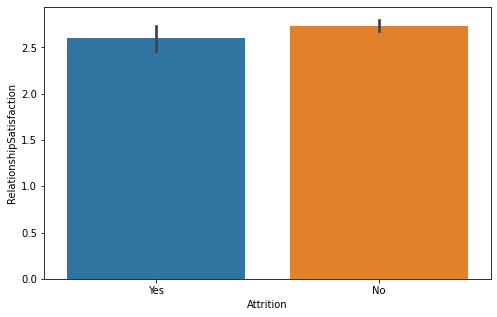

In [134]:
plt.figure(figsize=(8,5))
sns.barplot(x='Attrition',y='RelationshipSatisfaction',data=df)


### We Know that when the co-workers are having good relationship with each other they dont want to leave the organiszation and when they are having bad relationship with senior or juniors they tend change the organisation which leads to attrition

<AxesSubplot:xlabel='Gender', ylabel='YearsAtCompany'>

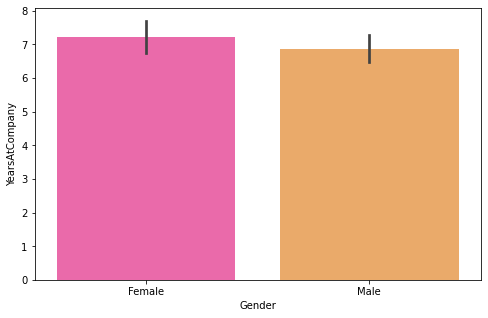

In [136]:
plt.figure(figsize=(8,5))
sns.barplot(x='Gender',y='YearsAtCompany',data=df,palette="spring")

### We can see that Females are giving more years to company as compared to man..

<h2 style='text-align:center;font-size:40px;background-color:orange;border:40px;color:white'> C. Multivariate Analysis <h2>

<Figure size 720x360 with 0 Axes>

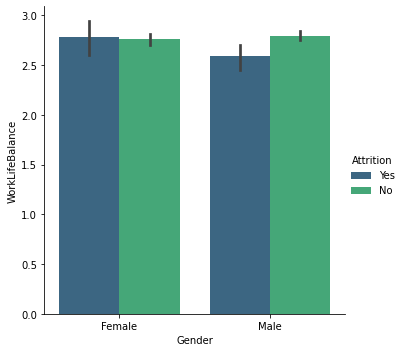

In [142]:
plt.figure(figsize=(10,5))
sns.catplot(x='Gender',y='WorkLifeBalance',data=df,kind="bar",hue='Attrition',palette="viridis")

### The female employees with bad WorkLifeBalance facing more attrition compare to male employees. Attrition is also present in males bcz of Worklife Balance..This should be reduced to minimum

<AxesSubplot:xlabel='Gender', ylabel='YearsSinceLastPromotion'>

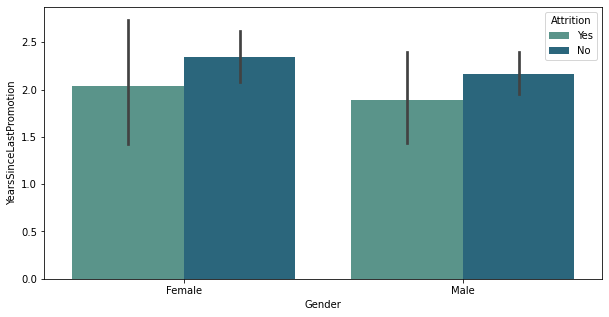

In [144]:
plt.figure(figsize=(10,5))
sns.barplot(x='Gender',y='YearsSinceLastPromotion',data=df,hue='Attrition',palette="crest")

### Important :- if a employee of any gender is not getting promotion from 1.9 year there is chance of attrition .. So organisation should focus more on Promotion schemes .. And Here we can also see one thing that tendency to stay without promotion is little more in Females as compared to Males

<AxesSubplot:xlabel='Gender', ylabel='YearsInCurrentRole'>

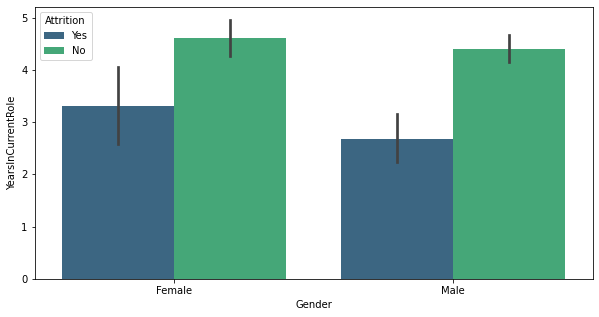

In [145]:
plt.figure(figsize=(10,5))
sns.barplot(x='Gender',y='YearsInCurrentRole',data=df,hue='Attrition',palette="viridis")

### 3.2 year Female and 2.8 years for Male is a  YearsInCurrentRole limit ,if within this limit no promotion is given there is a chances of attrition..Here also we can see that the tendency of female is more than Males

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

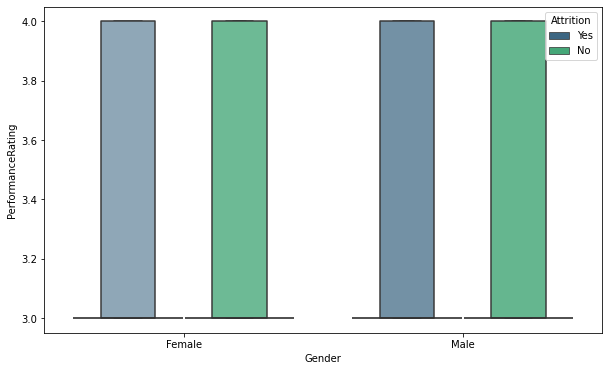

In [148]:
plt.figure(figsize=(10,6))
sns.boxenplot(df['Gender'],df['PerformanceRating'],data=df,hue=df['Attrition'],palette="viridis")

### Here the Performance rating of male and female is equal and attrition is also equal

<AxesSubplot:xlabel='MaritalStatus', ylabel='NumCompaniesWorked'>

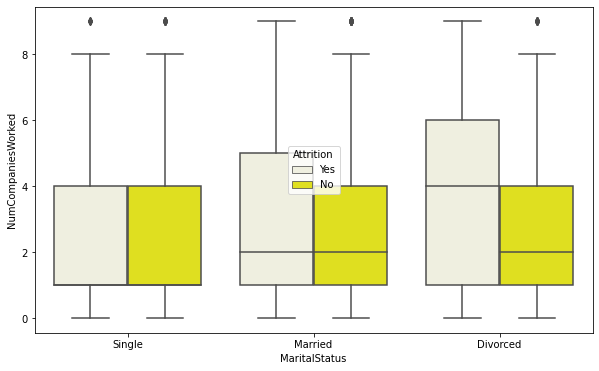

In [155]:
plt.figure(figsize=(10,6))
sns.boxplot(x='MaritalStatus',y='NumCompaniesWorked',data=df,hue='Attrition',color="yellow")

### The Employee who are divorsed have more Number of attrition as compared to married and single..In case single the attririon yes and no are equal

<AxesSubplot:xlabel='MaritalStatus', ylabel='PercentSalaryHike'>

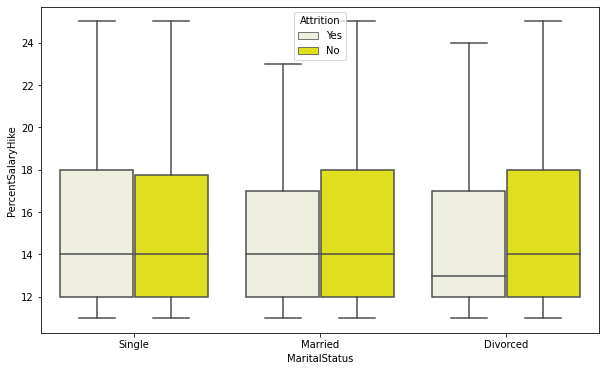

In [156]:
plt.figure(figsize=(10,6))
sns.boxplot(x='MaritalStatus',y='PercentSalaryHike',data=df,hue='Attrition',color="yellow")

### In case of single the attrition is more as compared to Married and Divorced.. This may beause single dont want settle for less and till they are not married they seeks organisations which has more salary hikes

In [158]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

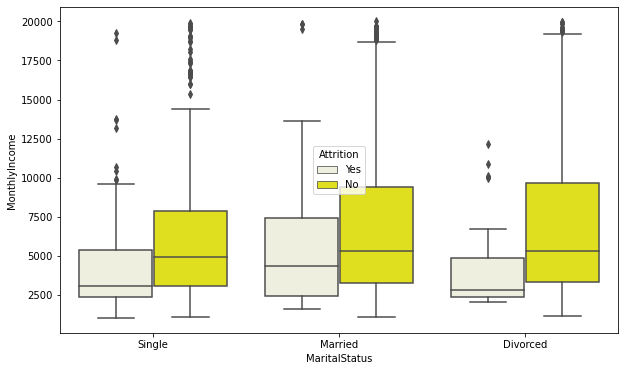

In [159]:
plt.figure(figsize=(10,6))
sns.boxplot(x='MaritalStatus',y='MonthlyIncome',data=df,hue='Attrition',color="yellow")

### We can see that in case In case of Married the attrition is more in case on monthly income ..This may be because they have more expenses as compared to single and Divorsed

<AxesSubplot:xlabel='Attrition', ylabel='TrainingTimesLastYear'>

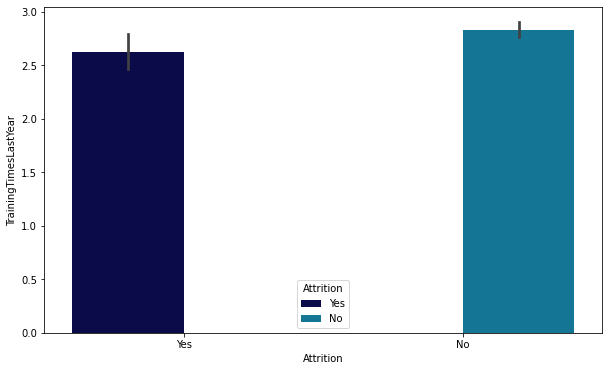

In [162]:
plt.figure(figsize=(10,6))
sns.barplot(x='Attrition',y='TrainingTimesLastYear',data=df,hue='Attrition',palette="ocean")

### The Employee who were given more time in training seem to have less attrition ..

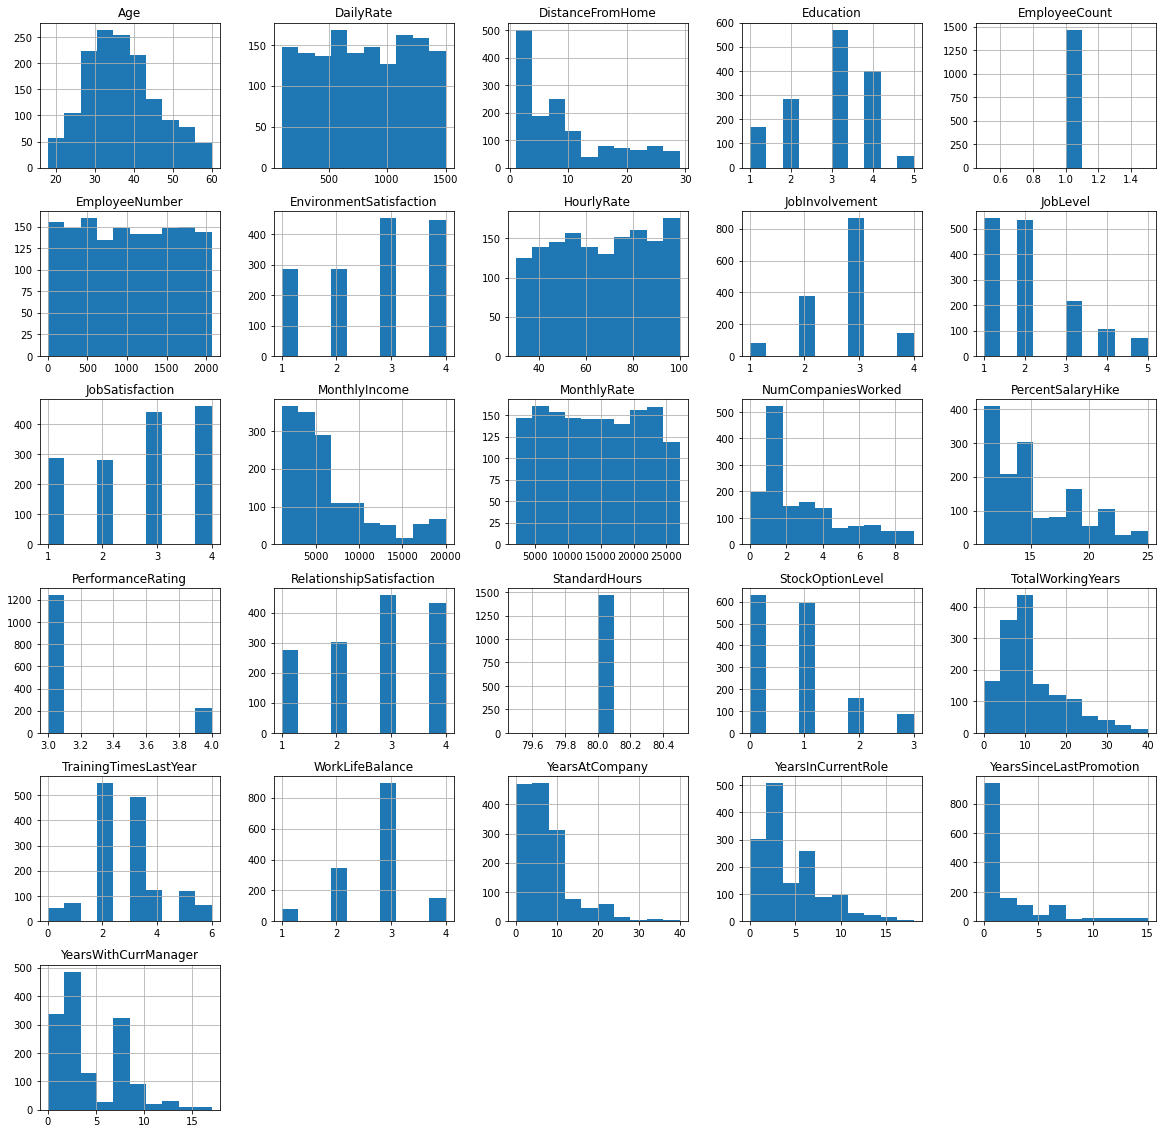

In [163]:
df.hist(bins=10, figsize=(20,20))
plt.show()

# We can see many coloums are left skewed we are going to correct it later

Age                            AxesSubplot(0.125,0.749828;0.0945122x0.130172)
DailyRate                   AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
DistanceFromHome            AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Education                   AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
EmployeeCount               AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
EmployeeNumber              AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
EnvironmentSatisfaction     AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
HourlyRate                     AxesSubplot(0.125,0.593621;0.0945122x0.130172)
JobInvolvement              AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
JobLevel                    AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
JobSatisfaction             AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
MonthlyIncome               AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
MonthlyRate                 AxesSubplot(0.692073,0.593621;0.0945

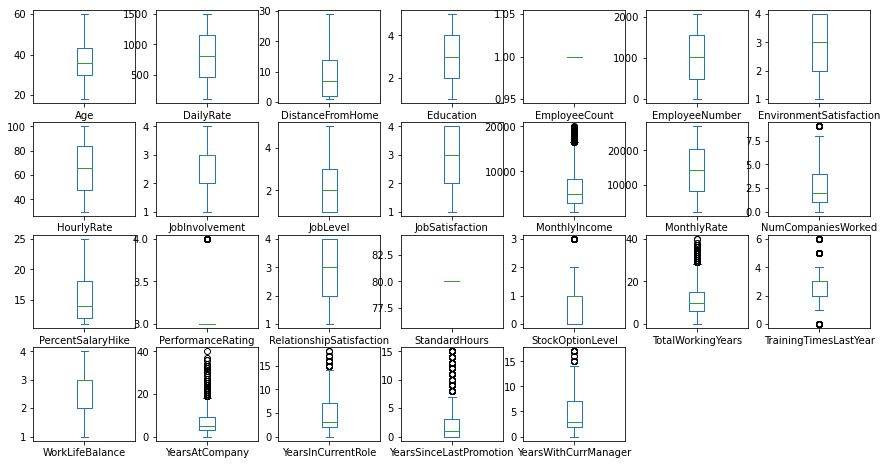

In [167]:
df.plot(kind='box',subplots=True,layout=(5,7),figsize=(15,10))

### Monthly Income,Performance Rating,Stock option level,Total Working Year,Training Time Last Year ,Year At Company ,Year In Current Company ,year at company,Year in current Role ,Year Since last promotion and Year With Curr Manager are having Outliers and these are required to be corrected

<h2 style='text-align:center;font-size:40px;background-color:black;border:40px;color:white'> CORRELATION <h2>

##### Before doing correlation lets drops some irrelevent columns and covert catAGORICAL COLUMNS  to int format

In [170]:
# Dropping irrelevant columns
df.drop(columns=["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], axis=1, inplace=True)

In [174]:
from sklearn.preprocessing import LabelEncoder

In [175]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [204]:
#Lets convert all catagorical columns to Int format

le = LabelEncoder()
Input = ['Attrition','BusinessTravel','Department','EducationField','Gender','OverTime','JobRole','MaritalStatus']

for i in Input:
    df[i] = le.fit_transform(df[i])

In [200]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,11,3,1,0,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,23,4,4,1,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,15,3,2,0,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,11,3,3,0,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,12,3,4,1,3,3,2,2,2,2


In [178]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


In [179]:
df.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
DistanceFromHome            0.077924
A

### We can see that there are many columns which are having Negative correlation with the Target variable and needs to be treated

##### These are the Percentage at which these are correleted

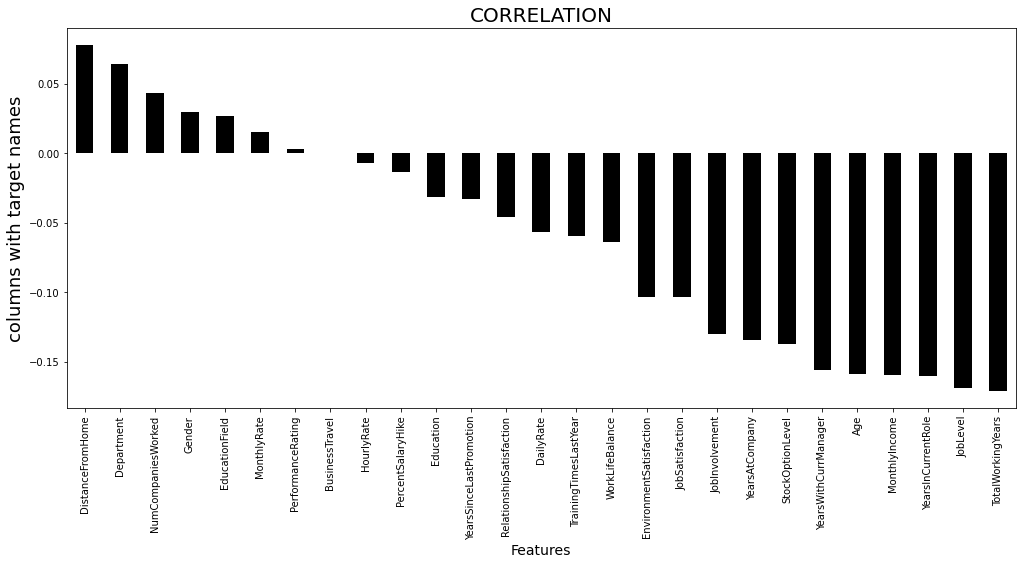

In [180]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='black')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

**Total Working Year and Job level are the most Negatively correlated to target varibale**

**Distance from home and Department are most postively correlated to target variable**

### GOinG To DrOp 2 MoSt NeGaTiveLy CorRelAtEd ColUmNs To TaRgET VarIaBlE

In [182]:
# Making a dataframe which is a conclusion of the columns that we will be dropping from the data

# TotalWorkingYears          -0.171063
# JobLevel                   -0.169105

delete=pd.DataFrame([["-0.171063","TotalWorkingYears ","No","Alot"],["-0.169105","JobLevel","No","Less"]],
                    columns=["Corelation with target","Column name","Normalised","Outliers"])

delete

,Corelation with target,Column name,Normalised,Outliers
0,-0.171063,TotalWorkingYears,No,Alot
1,-0.169105,JobLevel,No,Less


In [183]:
# Dropping these 2 columns here

df=df.drop(["TotalWorkingYears","JobLevel"],axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,11,3,1,0,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,23,4,4,1,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,15,3,2,0,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,11,3,3,0,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,12,3,4,1,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,17,3,3,1,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,15,3,1,1,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,20,4,2,1,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,14,3,4,0,3,2,9,6,0,8


<h2 style='text-align:center;font-size:40px;background-color:black;border:40px;color:white'> DESCRIPTIVE STATISTICS <h2>

In [185]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,15.209524,3.153741,2.712245,0.793878,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,3.659938,0.360824,1.081209,0.852077,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,12.000000,3.000000,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,14.000000,3.000000,3.000000,1.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,18.000000,3.000000,4.000000,1.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,25.000000,4.000000,4.000000,3.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### We can see all columns having count 1470. Looks like it doesn't contain missing values.

<AxesSubplot:>

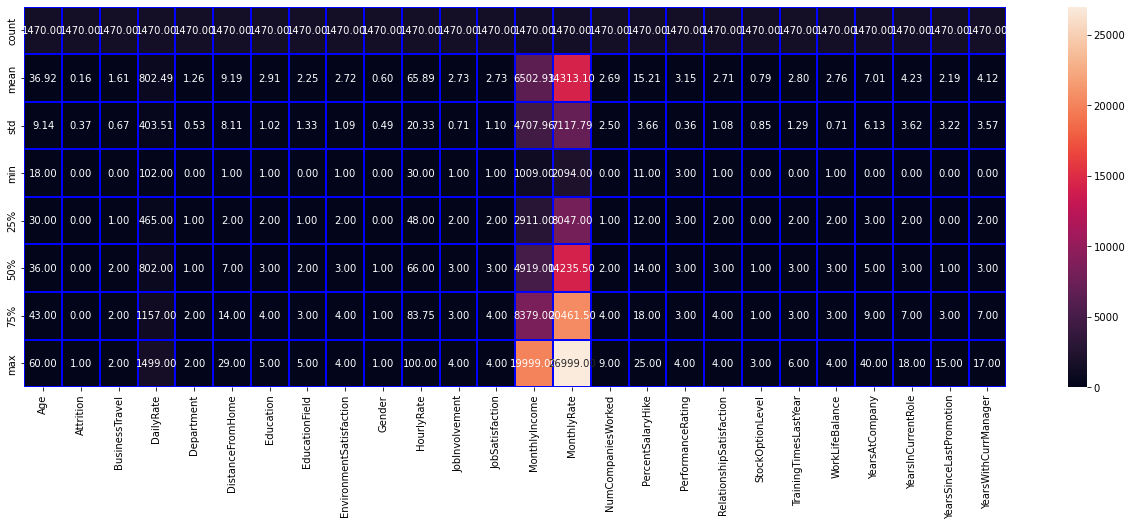

In [186]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="blue",fmt="0.2f")

### Outcome of describe() of dataset :-
**from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column**

**Total number rows and column in dataset:-**

**Rows :- 1470**

**columns :- 29**

## Lets do pandas profiling

In [188]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,11,3,1,0,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,23,4,4,1,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,15,3,2,0,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,11,3,3,0,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,12,3,4,1,3,3,2,2,2,2


<h2 style='text-align:center;font-size:40px;background-color:black;border:40px;color:white'> Now lets Check Outliers in the dataset <h2>

In [190]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,11,3,1,0,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,23,4,4,1,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,15,3,2,0,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,11,3,3,0,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,12,3,4,1,3,3,2,2,2,2


In [191]:
df.shape

(1470, 29)

Age                            AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Attrition                   AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
BusinessTravel              AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
DailyRate                   AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Department                  AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
DistanceFromHome            AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Education                   AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
EducationField                 AxesSubplot(0.125,0.593621;0.0945122x0.130172)
EnvironmentSatisfaction     AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Gender                      AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
HourlyRate                  AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
JobInvolvement              AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
JobSatisfaction             AxesSubplot(0.692073,0.593621;0.0945

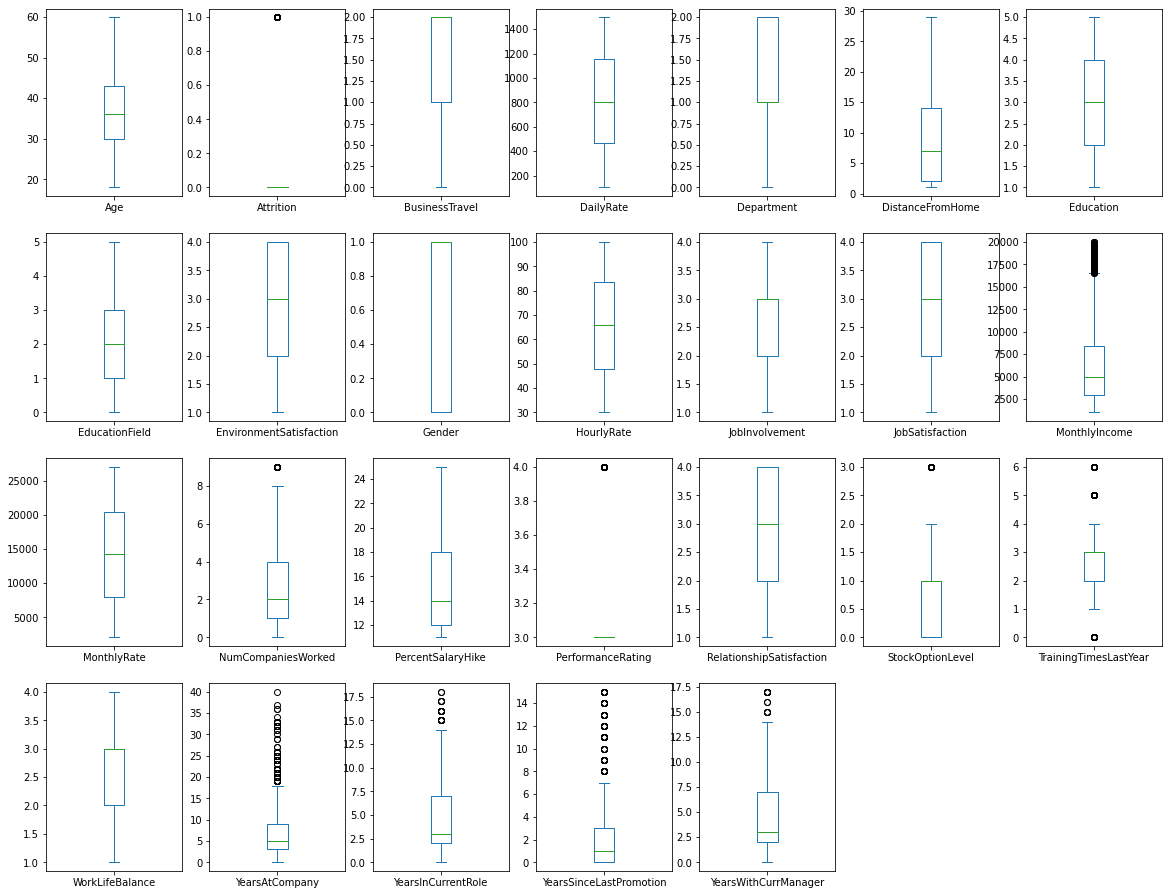

In [192]:
df.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20))

# Now lets subplot all the columns in the dataset by using Boxplot

### Monthly Income,Performance Rating,NumCompaniesWorked,Stock option level,Total Working Year,Training Time Last Year ,Year At Company ,Year In Current Company ,year at company,Year in current Role ,Year Since last promotion and Year With Curr Manager are having Outliers and these are required to be corrected

<h2 style='text-align:center;font-size:50px;background-color:Black;border:50px;color:white'> Lets Check Skewness <h2>


In [194]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

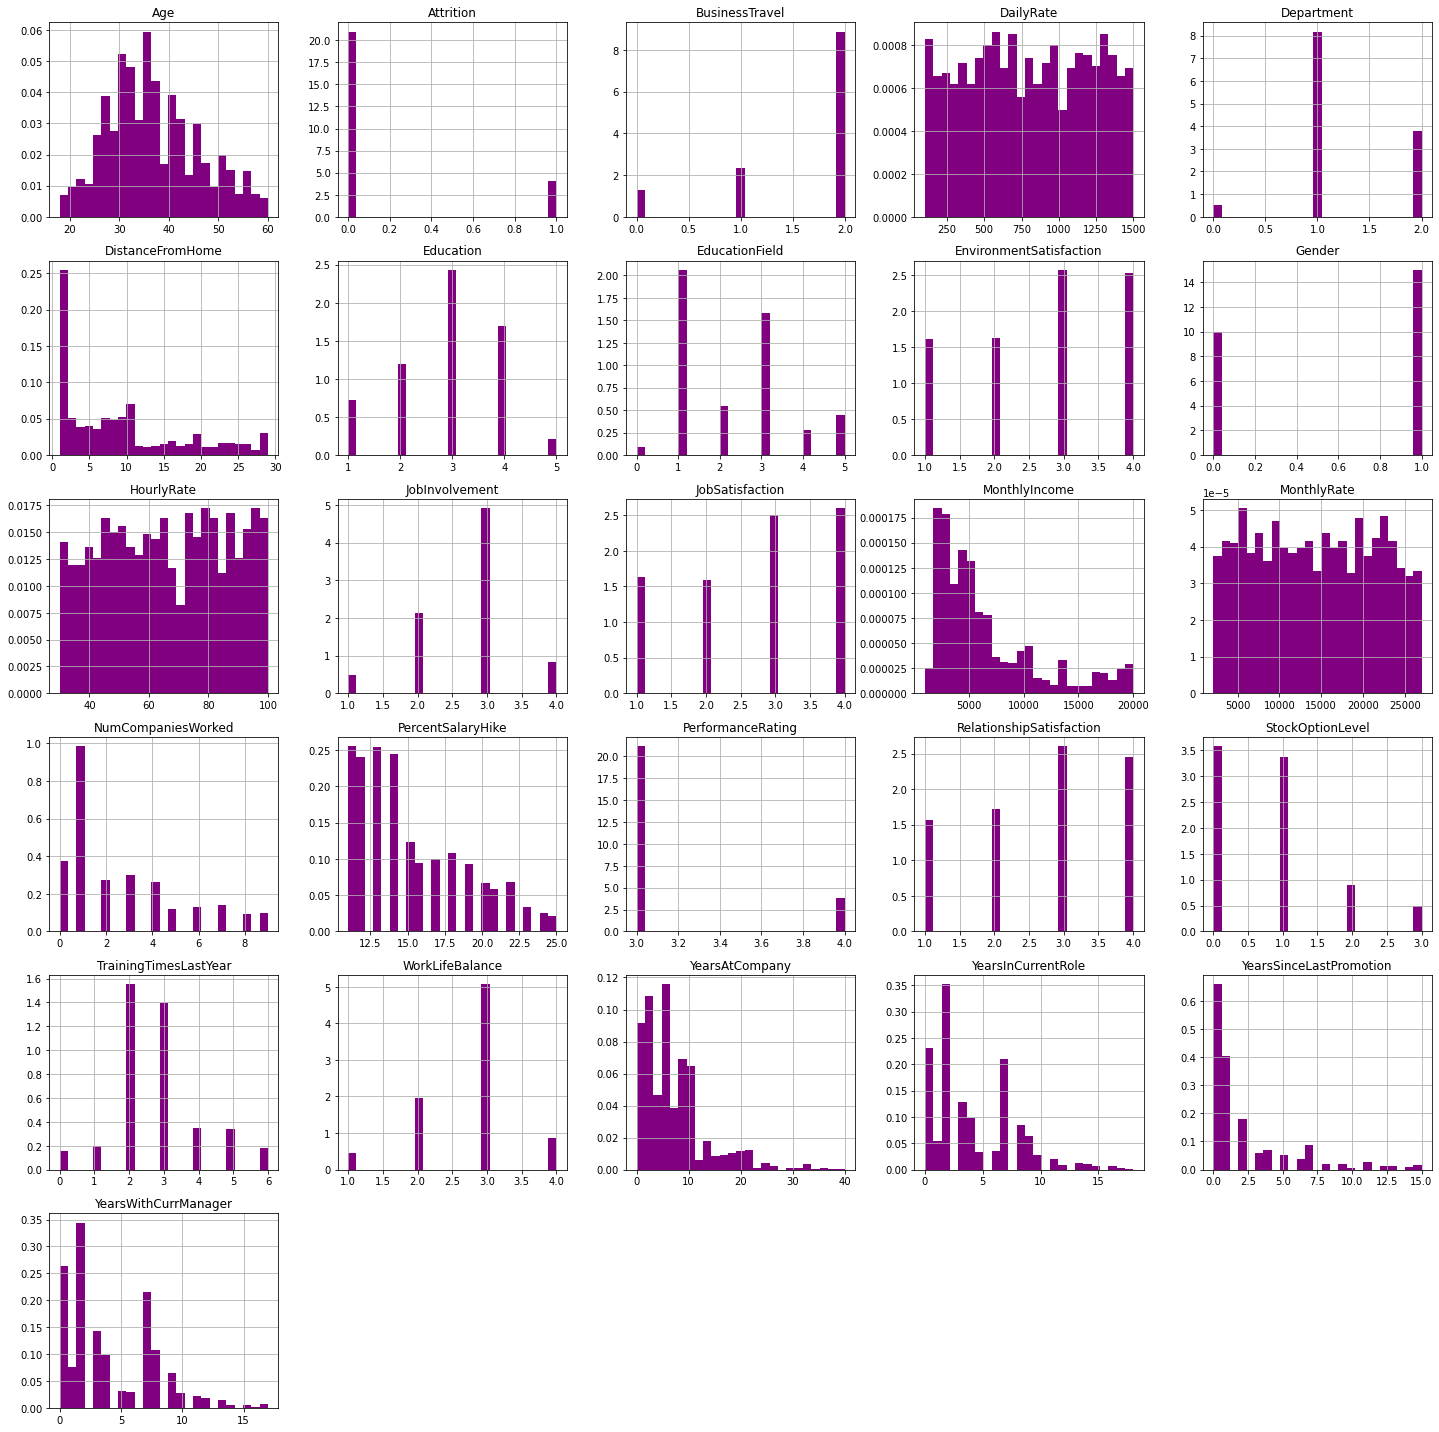

In [195]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='purple',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

## Attrition,BusinessTravel,DistanceFromHome,EducationField,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager these columns are skewed

<h2 style='text-align:center;font-size:50px;background-color:Black;border:30px;color:white'> *Now Lets Remove Outliers Now* <h2>

# 1. ZSCORE Method

In [196]:
df.shape

(1470, 29)

In [205]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   98,  110,  123,  123,  123,
         126,  126,  153,  178,  187,  190,  190,  218,  231,  231,  237,
         237,  270,  281,  326,  386,  386,  411,  425,  425,  427,  466,
         473,  477,  535,  561,  561,  584,  592,  595,  595,  616,  635,
         653,  653,  677,  686,  701,  716,  746,  749,  752,  799,  838,
         861,  861,  875,  875,  914,  914,  918,  922,  926,  926,  937,
         962,  976,  976, 1008, 1024, 1078, 1078, 1086, 1086, 1093, 1111,
        1116, 1135, 1138, 1138, 1156, 1221, 1223, 1242, 1295, 1301, 1303,
        1327, 1331, 1348, 1351, 1414, 1430], dtype=int64),
 array([28, 27, 25, 27, 26, 27, 25, 27, 26, 27, 28, 25, 27, 28, 27, 28, 25,
        26, 27, 26, 28, 25, 27, 25, 26, 27, 27, 28, 25, 25, 27, 27, 26, 25,
        25, 27, 25, 28, 27, 25, 25, 27, 28, 28, 25, 27, 25, 28, 27, 26, 26,
        25, 27, 27, 27, 25, 27, 27, 28, 25, 27, 25, 27, 27, 28, 27, 25, 26,
        27, 27, 26, 27, 28, 25, 27, 27, 25, 2

In [206]:
df_new=df[(z<3).all(axis=1)]

In [207]:
df_new.shape

(1396, 29)

In [208]:
# Percentage of data loss

DataLoss=((1470-1396)/1470)*100
DataLoss

5.034013605442176

### 5.034013605442176% is data lossed dusing Outlier Removal by Zscore method

# 2. IQR (Inter Quantile Range) method

In [209]:
#1st quantile
Q1=df.quantile(0.25)

# 3rd quantile
Q3=df.quantile(0.75)

#IQR
IQR=Q3 - Q1
qq=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [210]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",qq.shape)
print("\nTotal Dropped rows:",df.shape[0]-qq.shape[0])

Old DataFrame data in Rows and Column: (1470, 29)

New DataFrame data in Rows and Column: (654, 29)

Total Dropped rows: 816


In [211]:
#Percentage Data Loss using IQR
data_loss1 = (1470-654)/1470*100
data_loss1

55.51020408163265

## 55.51020408163265% is the data loss by IQR Method

### Hence, it is not appropriate to consider IQR MEthod for removing Outlier and we will go by ZSCORE Method

<h2 style='text-align:center;font-size:40px;background-color:Black;border:30px;color:white'> *Now Lets Remove Skewness Now* <h2>

In [212]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
Y

## Attrition,BusinessTravel,DistanceFromHome,EducationField,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager these columns are skewed

In [213]:
L1=["Attrition","BusinessTravel","DistanceFromHome","EducationField","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","PerformanceRating","StockOptionLevel","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]

In [214]:
# Lets remove the skewness from given columns by Power Transform Method

from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [215]:
#Removing skewness using yeo-johnson
df_new[["Attrition","BusinessTravel","DistanceFromHome","EducationField","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","PerformanceRating","StockOptionLevel","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]] = PT.fit_transform(df_new[["Attrition","BusinessTravel","DistanceFromHome","EducationField","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","PerformanceRating","StockOptionLevel","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]].values)

In [216]:
#Checking skewness after removing skewness by power transform
df_new.skew()

Age                         0.471805
Attrition                   1.816422
BusinessTravel             -0.965712
DailyRate                  -0.014303
Department                  0.172385
DistanceFromHome           -0.008473
Education                  -0.285071
EducationField             -0.008814
EnvironmentSatisfaction    -0.326665
Gender                     -0.416014
HourlyRate                 -0.035303
JobInvolvement             -0.499939
JobRole                    -0.385291
JobSatisfaction            -0.342818
MaritalStatus              -0.164128
MonthlyIncome               0.028586
MonthlyRate                 0.024414
NumCompaniesWorked          0.014782
OverTime                    0.956942
PercentSalaryHike           0.112406
PerformanceRating           0.000000
RelationshipSatisfaction   -0.293009
StockOptionLevel            0.091291
TrainingTimesLastYear       0.057777
WorkLifeBalance            -0.010595
YearsAtCompany             -0.025749
YearsInCurrentRole         -0.071015
Y

## We can see that the skewness in the columns are removed now

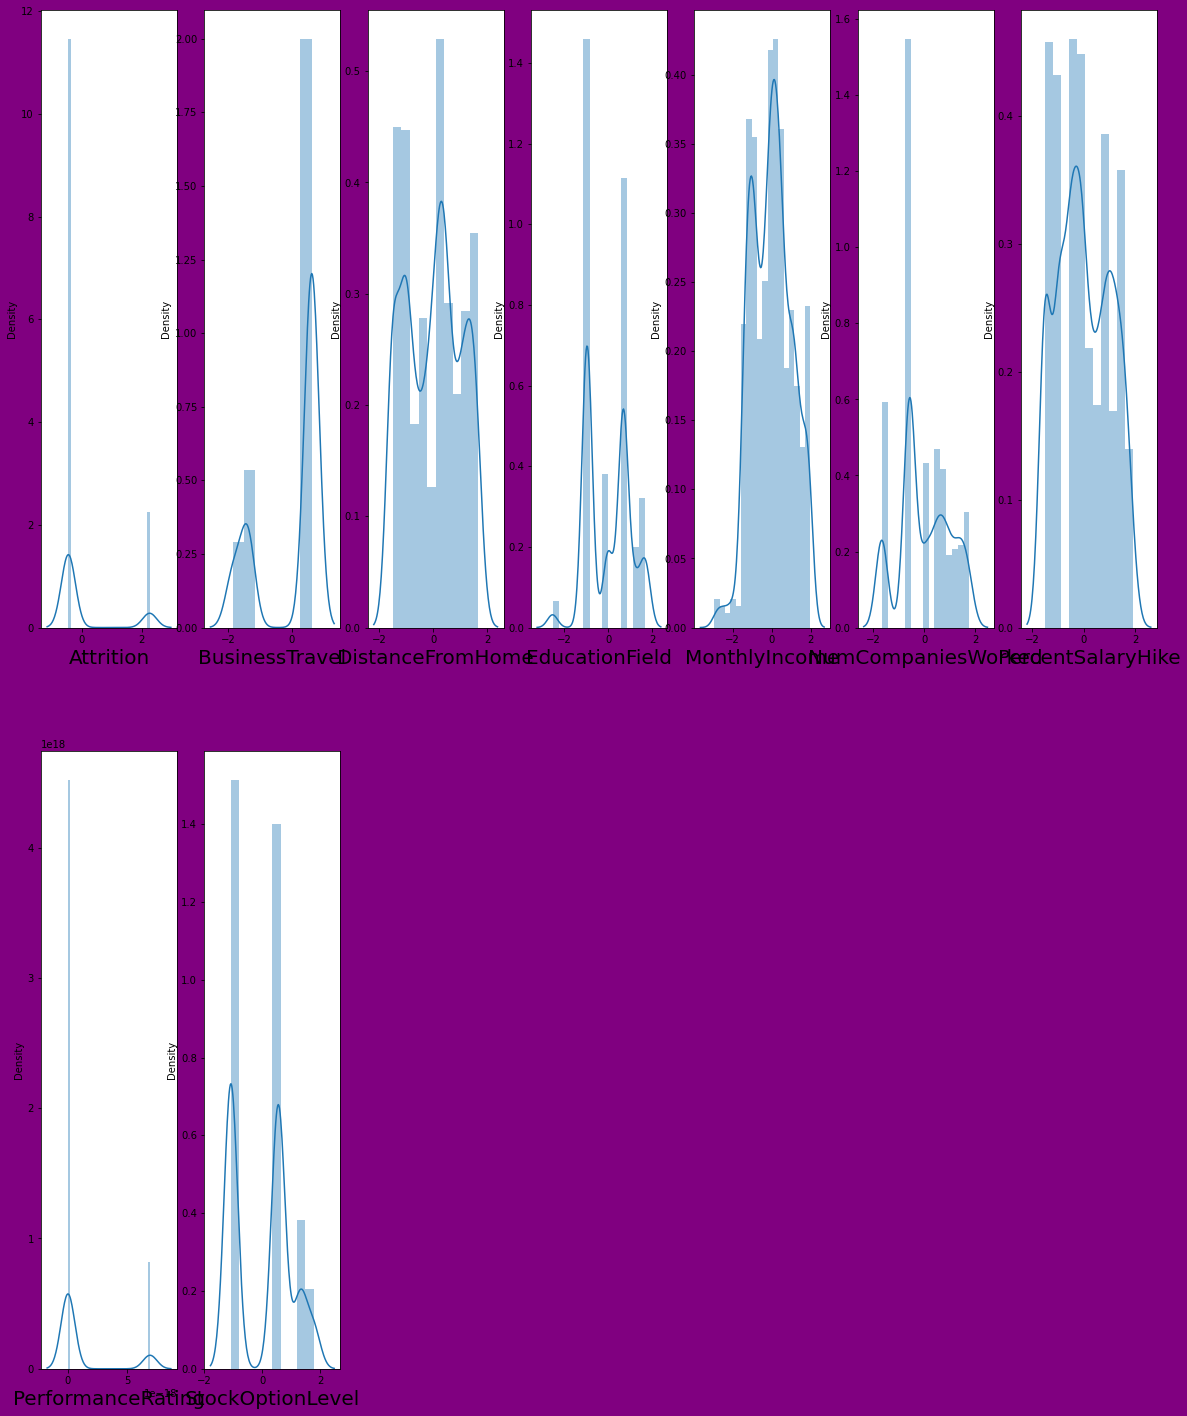

In [218]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,25), facecolor='purple')
plotnumber = 1

for column in df_new[L1]:
    if plotnumber<=9:
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Now all the columns which we skewed has been normalized now

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> *Now Lets Split the dataset into dependent and independent variable* <h2>

In [219]:
df_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.257448,0.637033,1102,2,-1.492391,2,-0.959825,2,0,...,-1.493901,0.000000e+00,1,-1.082826,-2.586924,-2.150610,0.226390,0.283661,-1.073953,0.576129
1,49,-0.442978,-1.387343,279,1,0.242378,1,-0.959825,3,1,...,1.686838,6.938894e-18,4,0.550875,0.217418,0.276577,0.945714,1.001194,0.188222,1.013891
2,37,2.257448,0.637033,1373,1,-1.030977,2,1.242723,4,1,...,0.192538,0.000000e+00,2,-1.082826,0.217418,0.276577,-2.156228,-1.574293,-1.073953,-1.531134
3,33,-0.442978,-1.387343,1392,1,-0.700824,4,-0.959825,4,0,...,-1.493901,0.000000e+00,3,-1.082826,0.217418,0.276577,0.617308,1.001194,1.021604,-1.531134
4,27,-0.442978,0.637033,591,1,-1.030977,1,0.693308,1,1,...,-0.956828,0.000000e+00,4,0.550875,0.217418,0.276577,-0.939970,-0.397545,0.717076,-0.355196


In [220]:
x=df_new.loc [:,df_new.columns != 'Attrition']

# Independent Variable

In [226]:
y=df_new.loc[:,'Attrition']


In [227]:
x.shape

(1396, 28)

In [228]:
y.shape

(1396,)

# Scale The Dataset

In [231]:
from sklearn.preprocessing import StandardScaler

In [232]:
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.517721,0.637033,0.736286,1.402493,-1.492391,-0.879522,-0.959825,-0.665808,-1.229143,1.385217,...,-1.493901,-0.425499,-1.570384,-1.082826,-2.586924,-2.150610,0.226390,0.283661,-1.073953,0.576129
1,1.413586,-1.387343,-1.306025,-0.492841,0.242378,-1.856302,-0.959825,0.250827,0.813575,-0.242156,...,1.686838,2.350184,1.198782,0.550875,0.217418,0.276577,0.945714,1.001194,0.188222,1.013891
2,0.069789,0.637033,1.408785,-0.492841,-1.030977,-0.879522,1.242723,1.167462,0.813575,1.286588,...,0.192538,-0.425499,-0.647329,-1.082826,0.217418,0.276577,-2.156228,-1.574293,-1.073953,-1.531134
3,-0.378144,-1.387343,1.455934,-0.492841,-0.700824,1.074038,-0.959825,1.167462,-1.229143,-0.488728,...,-1.493901,-0.425499,0.275726,-1.082826,0.217418,0.276577,0.617308,1.001194,1.021604,-1.531134
4,-1.050042,0.637033,-0.531783,-0.492841,-1.030977,-1.856302,0.693308,-1.582443,0.813575,-1.277757,...,-0.956828,-0.425499,1.198782,0.550875,0.217418,0.276577,-0.939970,-0.397545,0.717076,-0.355196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,-0.042194,-1.387343,0.195310,-0.492841,1.408375,-0.879522,0.693308,0.250827,0.813575,-1.228443,...,0.714152,-0.425499,0.275726,0.550875,0.217418,0.276577,-0.002680,-0.397545,-1.073953,0.011393
1392,0.293755,0.637033,-0.477189,-0.492841,-0.051924,-1.856302,0.693308,1.167462,0.813575,-1.179128,...,0.192538,-0.425499,-1.570384,0.550875,1.604772,0.276577,0.431344,1.001194,0.188222,1.013891
1393,-1.050042,0.637033,-1.613737,-0.492841,-0.443139,0.097258,-0.959825,-0.665808,0.813575,1.040017,...,1.282215,2.350184,-0.647329,0.550875,-2.586924,0.276577,0.226390,-0.397545,-1.073953,0.011393
1394,1.413586,-1.387343,0.540244,1.402493,-1.030977,0.097258,0.693308,1.167462,0.813575,-0.143527,...,-0.130680,-0.425499,1.198782,-1.082826,0.217418,-1.113546,0.787885,0.787785,-1.073953,1.202630


# Balancing the dataset over here,otherwise it will be a baised dataset

In [236]:
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
y= lab.fit_transform(y)

In [237]:
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [238]:
from imblearn.over_sampling import SMOTE

In [239]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [240]:
x.shape

(2334, 28)

In [241]:
y.shape

(2334,)

<AxesSubplot:ylabel='count'>

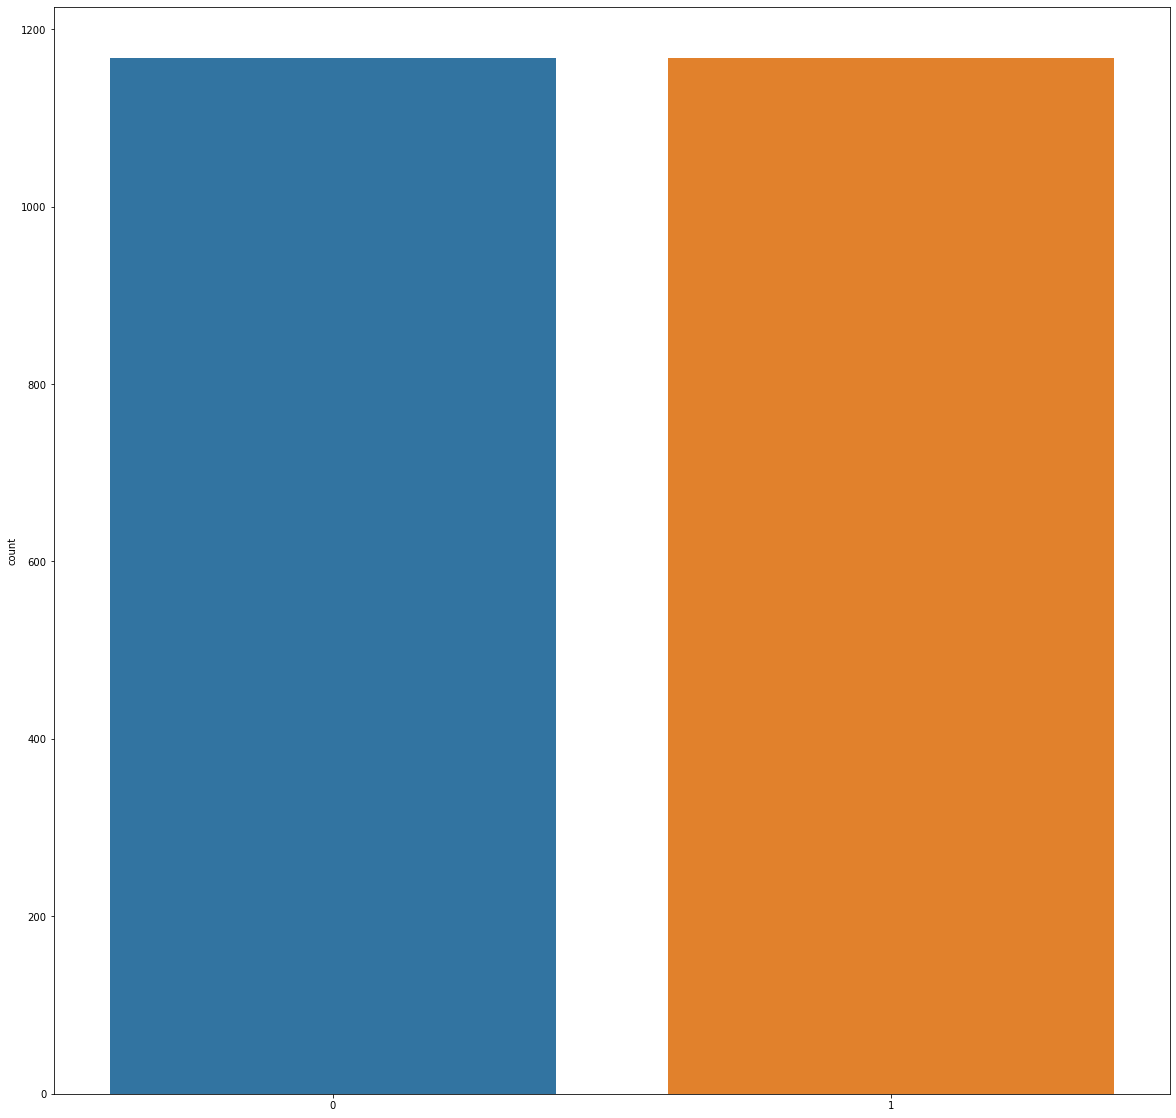

In [245]:
sns.countplot(y)

### Now we can see that the dataset is balanced

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> *Now Lets Whether Multicollinearity is present in the dataset or not ?* <h2>

### WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [243]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [244]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [246]:
vif_cal()

    VIF FACTOR                  FEATURES
0     1.640251                       Age
1     1.019351            BusinessTravel
2     1.046905                 DailyRate
3     2.480115                Department
4     1.044325          DistanceFromHome
5     1.072246                 Education
6     1.054061            EducationField
7     1.042880   EnvironmentSatisfaction
8     1.041435                    Gender
9     1.048514                HourlyRate
10    1.045851            JobInvolvement
11    2.360798                   JobRole
12    1.053659           JobSatisfaction
13    2.636643             MaritalStatus
14    1.912177             MonthlyIncome
15    1.052760               MonthlyRate
16    1.291185        NumCompaniesWorked
17    1.077838                  OverTime
18    1.883939         PercentSalaryHike
19    1.887218         PerformanceRating
20    1.031980  RelationshipSatisfaction
21    2.565232          StockOptionLevel
22    1.042414     TrainingTimesLastYear
23    1.040533  

### We can see No Multicollinearity is present in the dataset

## Lets do PCA - Principal Component Analysis

In [247]:
from sklearn.decomposition import PCA

In [248]:
pca=PCA(n_components=10)

In [249]:
x=pca.fit_transform(x)
x

array([[ 0.57255678, -1.18532624, -1.83021981, ...,  1.44347272,
        -0.33775138, -0.61678833],
       [ 1.9695009 ,  0.0107484 ,  2.22680627, ..., -1.76806902,
         0.50000928,  0.42615923],
       [-3.17449816,  0.47818259,  0.3041278 , ...,  1.99656761,
         1.24891443, -0.58522511],
       ...,
       [-2.22154062, -0.61342044,  3.04362528, ..., -1.44620017,
         0.4390257 ,  0.22976763],
       [ 1.66005322, -2.69849182, -0.37695707, ...,  0.60351731,
         0.43200501, -0.06035556],
       [ 2.29840845, -2.92799183,  2.15603032, ...,  0.42186633,
         1.12308997, -0.99183724]])

## Now Our dataset is Reduced to n_component = 10

# -------------------------------------------------------------------

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [252]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  29  The model performs very well
At random_state:- 29
Training accuaracy_score is :- 73.9
Testing accuracy_score is:- 73.9 


At random state  87  The model performs very well
At random_state:- 87
Training accuaracy_score is :- 73.9
Testing accuracy_score is:- 73.9 




In [253]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=29)

In [254]:
lr.fit(x_train,y_train)

LogisticRegression()

In [255]:
pred_train=lr.predict(x_train)

In [256]:
pred_test=lr.predict(x_test)

In [257]:
accuracy_score(y_test,pred_test)

0.7387580299785867

In [258]:
from sklearn.metrics import classification_report

In [259]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       249
           1       0.71      0.75      0.73       218

    accuracy                           0.74       467
   macro avg       0.74      0.74      0.74       467
weighted avg       0.74      0.74      0.74       467



# CROSS VALIDATION FOR LOGISTICS REGRESSION

In [260]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)

In [261]:
for i in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 73.8653251956108
Accuracy_score is :- 73.87580299785867


At cv:- 5
Cross validation score is :- 73.77948920605452
Accuracy_score is :- 73.87580299785867


At cv:- 6
Cross validation score is :- 73.60754070265637
Accuracy_score is :- 73.87580299785867


At cv:- 7
Cross validation score is :- 73.39375303447159
Accuracy_score is :- 73.87580299785867


At cv:- 8
Cross validation score is :- 73.82167066798475
Accuracy_score is :- 73.87580299785867


At cv:- 9
Cross validation score is :- 74.03606903606902
Accuracy_score is :- 73.87580299785867




In [262]:
# I will take CV as 9 bcz its close to accuracy score
lsscore_selected= cross_val_score(lr,x,y,cv=9).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.7403606903606903 
The accuracy_score is: 0.7387580299785867


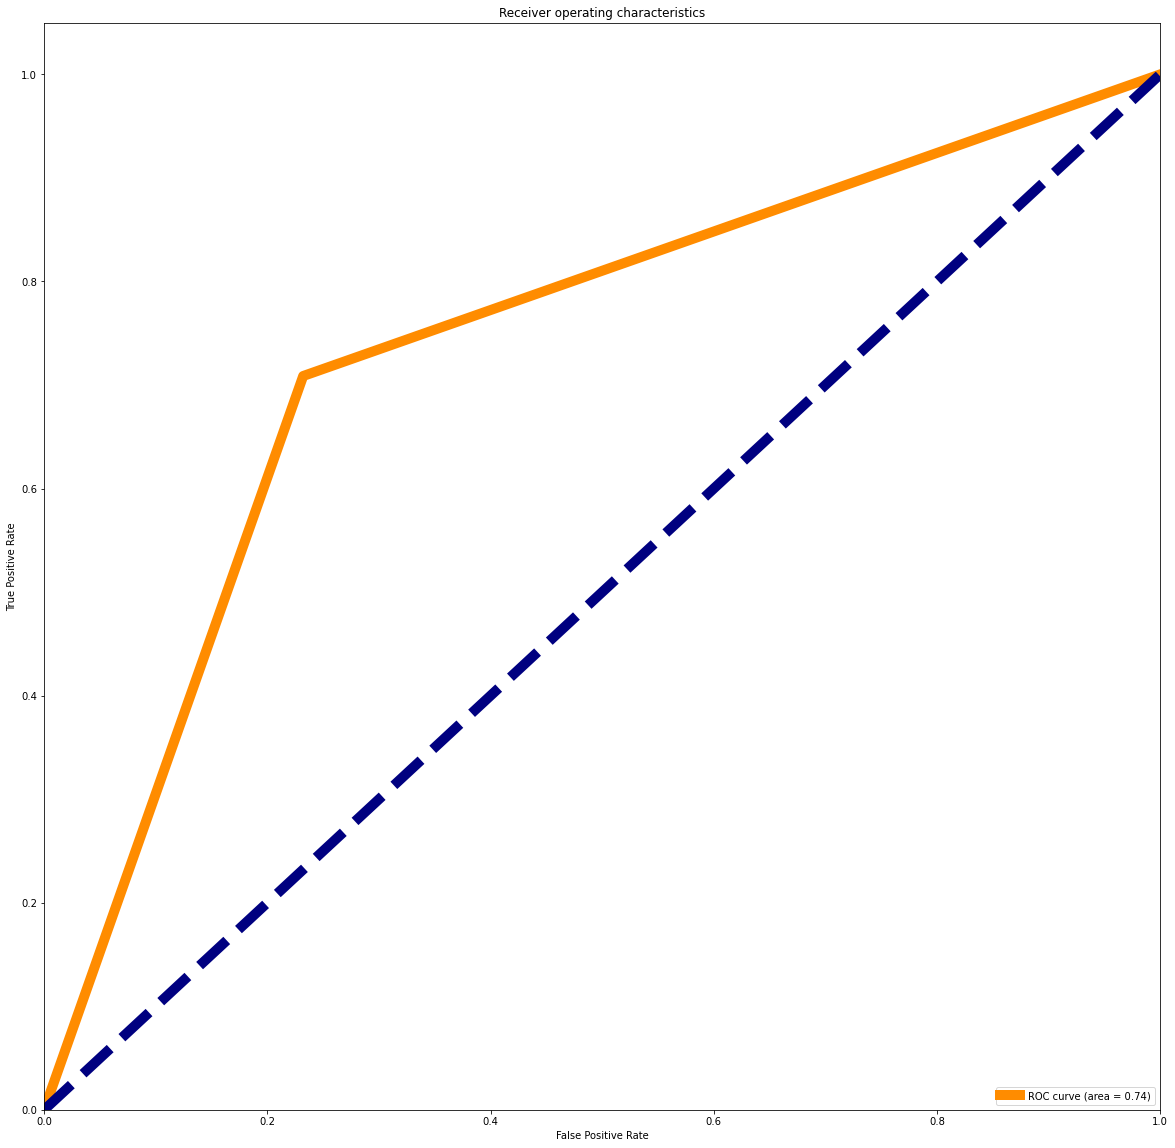

In [263]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### We can see that the area under RoC curve is 74% which is good

# DecisionTreeClassifier

In [265]:
from sklearn.tree import DecisionTreeClassifier

In [267]:
MAX_AUC=0
MAX_RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>MAX_AUC:
        MAX_AUC=acc
        MAX_RS=i
print("Best accuracy is ",MAX_AUC," on Random_state ",MAX_RS)

Best accuracy is  0.8273894436519258  on Random_state  23


In [268]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=23)

In [269]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [270]:
pred_train=DTC.predict(x_train)

In [271]:
pred_test=DTC.predict(x_test)

In [272]:
accuracy_score(y_test,pred_test)

0.8265524625267666

In [273]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       236
           1       0.82      0.83      0.83       231

    accuracy                           0.83       467
   macro avg       0.83      0.83      0.83       467
weighted avg       0.83      0.83      0.83       467



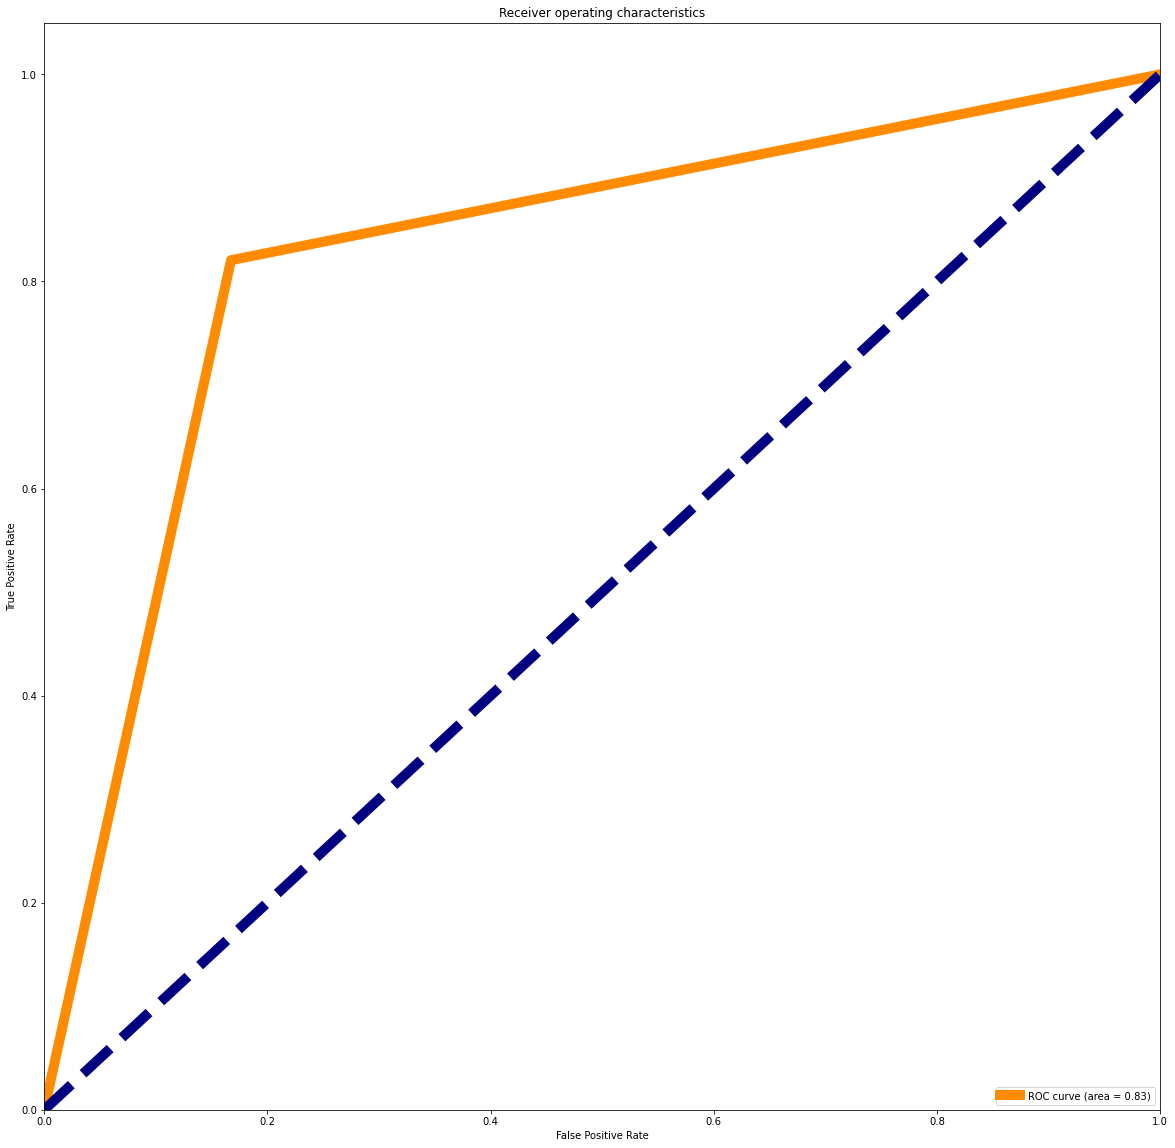

In [274]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### We can see that the area under RoC curve is 83% which is good

### Cross validation of DTC

In [279]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8144810726856659


In [280]:
pred_tc=DTC.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_tc)

In [281]:
for i in range(4,10):
    lsscore=cross_val_score(DTC,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 80.97875889941024
Accuracy_score is :- 82.65524625267666


At cv:- 5
Cross validation score is :- 80.67686171434873
Accuracy_score is :- 82.65524625267666


At cv:- 6
Cross validation score is :- 78.6203941730934
Accuracy_score is :- 82.65524625267666


At cv:- 7
Cross validation score is :- 79.69338029218268
Accuracy_score is :- 82.65524625267666


At cv:- 8
Cross validation score is :- 81.66248881984653
Accuracy_score is :- 82.65524625267666


At cv:- 9
Cross validation score is :- 80.93225093225094
Accuracy_score is :- 82.65524625267666




In [282]:
# I will take CV as 9 bcz its close to accuracy score
lsscore_selected= cross_val_score(DTC,x,y,cv=8).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.8123381819893611 
The accuracy_score is: 0.8265524625267666


## SVC

In [284]:
from sklearn.svm import SVC


# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8308351177730193
[[191  40]
 [ 39 197]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       231
           1       0.83      0.83      0.83       236

    accuracy                           0.83       467
   macro avg       0.83      0.83      0.83       467
weighted avg       0.83      0.83      0.83       467



In [285]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.8414746670832912


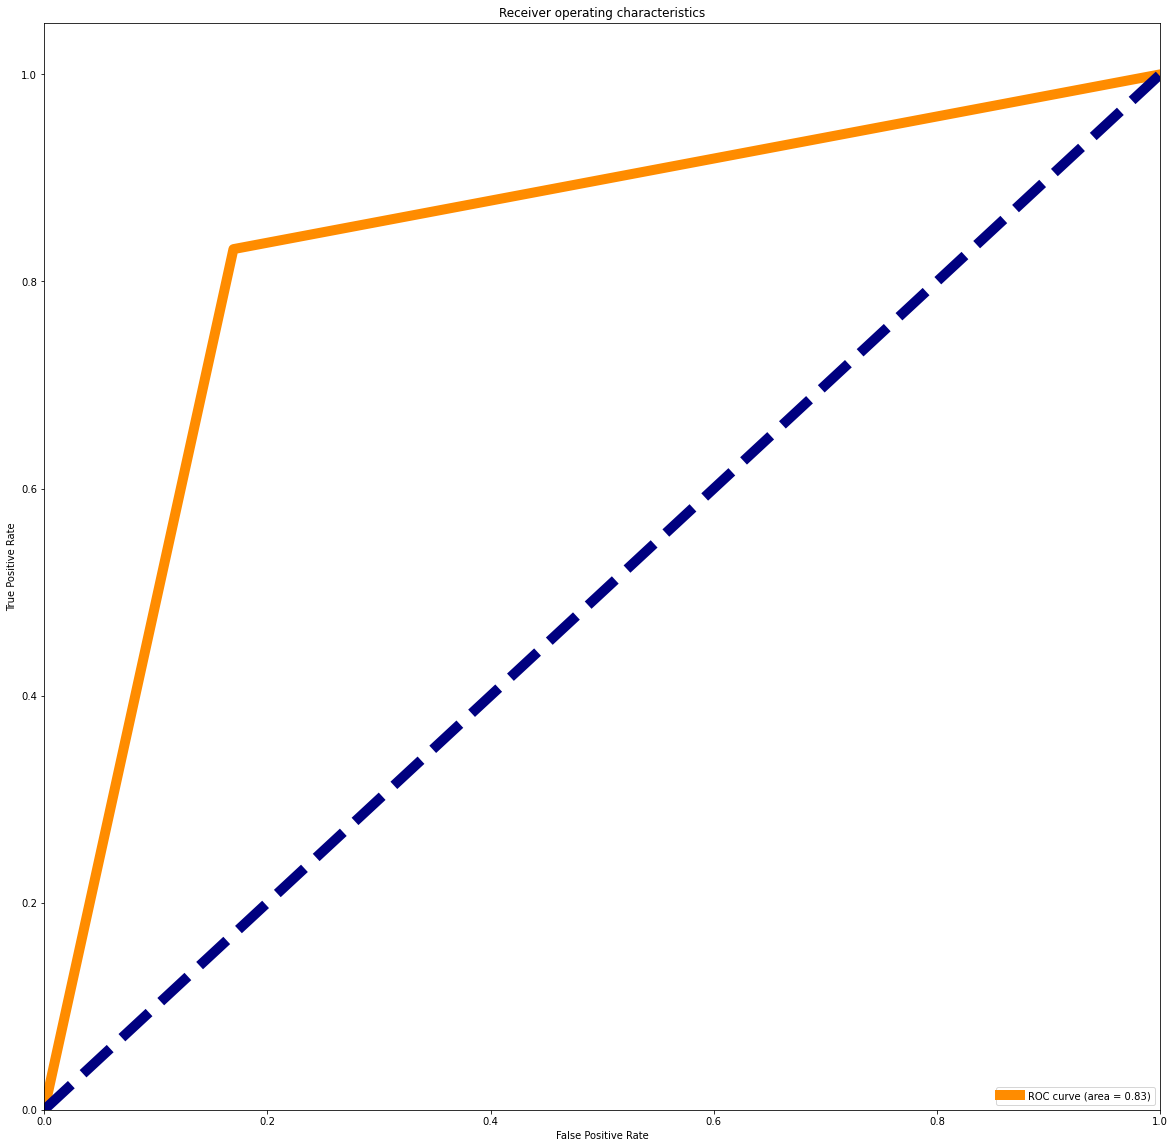

In [286]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

## 83% is under ROC curve

# KNeighborsClassifier

In [287]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

In [288]:
for i in range(0,3000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  1768  The model performs very well
At random_state:- 1768
Training accuaracy_score is :- 89.9
Testing accuracy_score is:- 89.9 




In [289]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1768)

In [290]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [291]:
pred_train=kn.predict(x_train)

In [292]:
pred_test=kn.predict(x_test)

In [293]:
accuracy_score(y_train,pred_train)

0.8993036957686128

In [299]:
accuracy_score(y_test,pred_test)

0.8993576017130621

In [295]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88       205
           1       0.87      0.97      0.92       262

    accuracy                           0.90       467
   macro avg       0.91      0.89      0.90       467
weighted avg       0.90      0.90      0.90       467



# Cross validation for KNeighborsClassifier

In [296]:
pred_kn=kn.predict(x_test)
from sklearn.model_selection import cross_val_score
kns=accuracy_score(y_test,pred_kn)

In [297]:
for i in range(4,20):
    lsscore=cross_val_score(kn,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",kns*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 85.64647019431847
Accuracy_score is :- 89.93576017130621


At cv:- 5
Cross validation score is :- 86.16068228396026
Accuracy_score is :- 89.93576017130621


At cv:- 6
Cross validation score is :- 85.77549271636676
Accuracy_score is :- 89.93576017130621


At cv:- 7
Cross validation score is :- 85.68885395232701
Accuracy_score is :- 89.93576017130621


At cv:- 8
Cross validation score is :- 86.37492350421316
Accuracy_score is :- 89.93576017130621


At cv:- 9
Cross validation score is :- 86.03141603141603
Accuracy_score is :- 89.93576017130621


At cv:- 10
Cross validation score is :- 86.71710502182606
Accuracy_score is :- 89.93576017130621


At cv:- 11
Cross validation score is :- 86.33283405406712
Accuracy_score is :- 89.93576017130621


At cv:- 12
Cross validation score is :- 86.28888007753987
Accuracy_score is :- 89.93576017130621


At cv:- 13
Cross validation score is :- 86.16005347848925
Accuracy_score is :- 89.93576017130621


At cv:- 14
Cross

In [300]:
lsscore_selected= cross_val_score(kn,x,y,cv=19).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",kns)

The cv score is :-  0.8645804835960353 
The accuracy_score is: 0.8993576017130621


# Ensemble Techniques

In [301]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


In [302]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9036402569593148
[[182  23]
 [ 22 240]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       205
           1       0.91      0.92      0.91       262

    accuracy                           0.90       467
   macro avg       0.90      0.90      0.90       467
weighted avg       0.90      0.90      0.90       467



In [305]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8920375697310015


In [303]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8265524625267666
[[166  39]
 [ 42 220]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       205
           1       0.85      0.84      0.84       262

    accuracy                           0.83       467
   macro avg       0.82      0.82      0.82       467
weighted avg       0.83      0.83      0.83       467



In [304]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.8093455624890866


# Hyper Parameter Tuning

In [307]:
mm=pd.DataFrame([["Logistic Regression","74%"],["Decision Tree Classifier","83%"],["KNeighbors Classifier","90%"],["SVC","83%"],["Random Forest Classifier","90%"],["Gradient Boosting","82%"]],
                    columns=["Model_Name","R2_SCORE"])

mm

,Model_Name,R2_SCORE
0,Logistic Regression,74%
1,Decision Tree Classifier,83%
2,KNeighbors Classifier,90%
3,SVC,83%
4,Random Forest Classifier,90%
5,Gradient Boosting,82%


## We will choose RFC as it accuracy score and cross validation just have a difference of 1str and its performing the best

In [308]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [312]:
from sklearn.model_selection import GridSearchCV
parameter={'criterion':['gini', 'entropy', 'log_loss'],
          'max_features':['auto','sqrt','log2'],'bootstrap': [True,False],'oob_score': [False,True]}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)


print (clf.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}


In [314]:
rf=RandomForestClassifier(criterion='entropy',max_features='log2',bootstrap=False,oob_score=False)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision= rf.predict(x_test)

rfs=accuracy_score(y_test,pred_decision)
print ('Accuracy Score :',rfs*100)


Accuracy Score : 92.71948608137045


# Now save the final model

In [315]:
#Saving the model using .pkl
import joblib
joblib.dump(rf,"HR_ATT_study.pkl")

['HR_ATT_study.pkl']

# Prediction

In [316]:
#Loading the saved model
aa=joblib.load("HR_ATT_study.pkl")

In [317]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,

In [318]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,457,458,459,460,461,462,463,464,465,466
Predicted,1,0,0,0,0,0,1,1,0,1,...,1,0,1,0,0,0,1,1,1,1
Original,1,1,0,0,0,0,1,1,0,1,...,1,0,1,0,0,0,0,1,1,1


# It is Performing the best till now